# Intro notes:

1. For all the challenges we only wish to see your thought process more than ready solutions; (for example, for task 1, if you decide to only outline a pseudocode for the solution and then later discuss that with us, thats ok (although we would like to see some code of your own))
2. Try to spend as little time as possible on the assignments and avoid perfectionism; we will be discussing the solutions together anyway

These two things combined mean that the criteria for evaluating the assignment are (in order):
1. Your approach and ability to explain it verbally to us in the upcoming round
2. Your code style

# Task 1: Image processing

Given is an image of a cat lying in grass and sand.
1. Write a pipeline that separates the cat from the background and show us the output.
2. Test the pipeline with some additional images of cats (augmented, generated)
3. Break the system :)
    - we are interested in seeing how you would test a machine learning system to understand why and how it fails

Try to write the pipeline as efficiently as possible and try to prove it by timing it.
You can import and use any approach, library & framework you like for this task.

In the next interview, please present your approach and explain your workflow/your ideas behind the individual steps.

<img src="example_pic_cat.jpg" alt="example cat" width="536" height="356"  />

In [3]:
import torch
import torchvision.transforms as transforms
from PIL import Image, ImageOps
from torchvision.models.segmentation import deeplabv3_resnet50
import os
import cv2
import warnings
import numpy as np
from torchvision.transforms import ToPILImage
from skimage import exposure
import matplotlib.pyplot as plt
%matplotlib inline
warnings.filterwarnings("ignore")

from helper import Gaussian_Histogram, Cat_Prediction

In [5]:
def normalising(image):
    """
    Normalize the input image using histogram equalization. Histogram equalization is a technique used to enhance the contrast of an 
    image by redistributing the intensity values. 

    Inputs:
        image (str): The path to the input image file.

    Returns:
        PIL image: The normalized image as a PIL image object.
    """
    if not os.path.exists(image):
        raise FileNotFoundError("Image not found at {}".format(image))
    image = Image.open(image).convert("RGB")
    image = exposure.equalize_hist(np.array(image))
    image = Image.fromarray(image.astype(np.uint8))
    return image


def gaussian_denoise(image):
    """
    This is a function to denoise the image with gaussian
    
    Inputs:
        image (str): The path to the input image file.

    Returns:
        PIL image: The normalized image as a PIL image object.
    """
    denoize = cv2.GaussianBlur(cv2.imread(image), (11, 11), 20)
    denoize = Image.fromarray(denoize.astype(np.uint8))
    return denoize

model = Cat_Prediction()

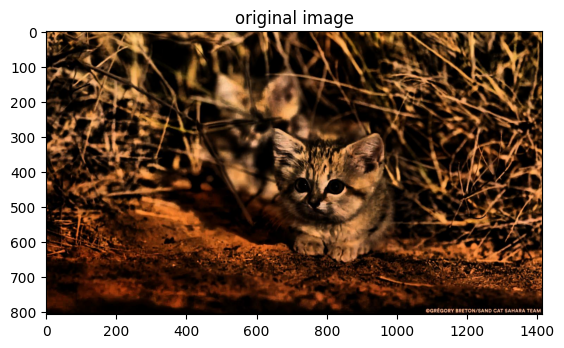

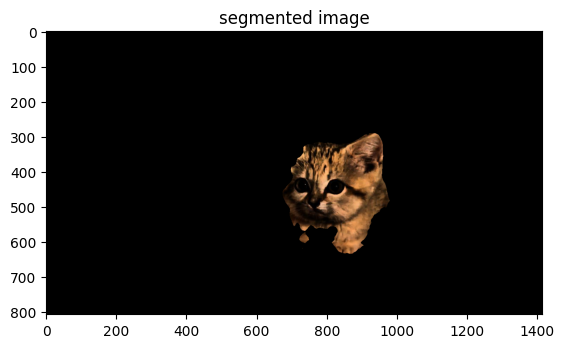

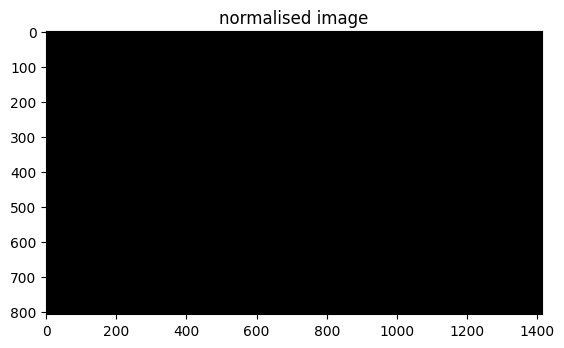

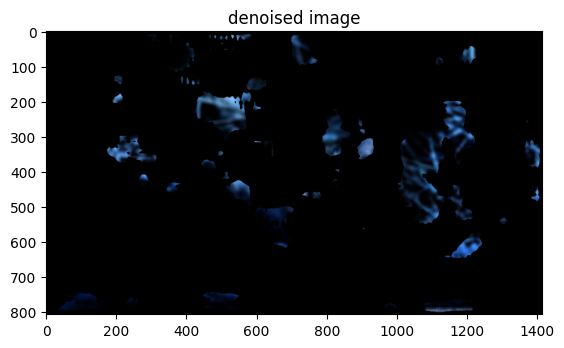

In [18]:
img = 'dataset/given_3.jpg'

# Prints Original Image
model.display_image(img, 'original image')

# Prints output of original image prediciton from model
model.display_image(model.segment(img), 'segmented image')

# Prints output of normalised image prediciton from model
model.display_image(normalising(img), 'normalised image')

# Prints output of denoised image prediciton from model
model.display_image(model.segment(gaussian_denoise(img)), 'denoised image')

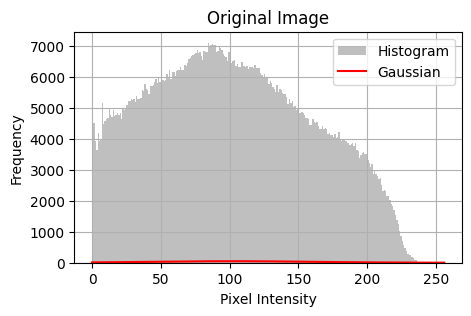

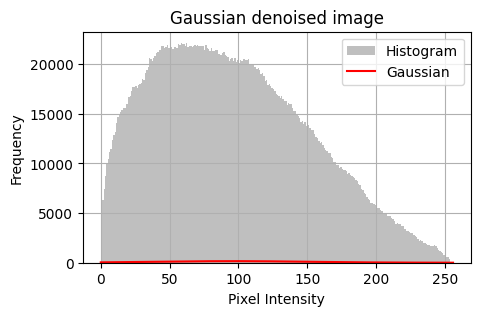

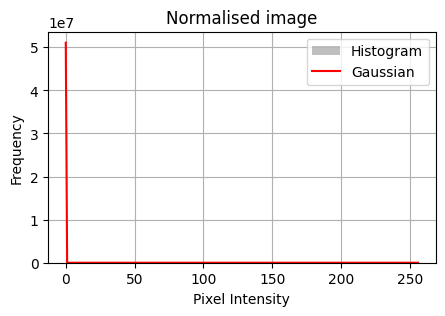

In [21]:
from helper import Gaussian_Histogram
# Load the image
image_path = 'dataset/given_1.jpg'
gh = Gaussian_Histogram()
gh.perform_gauss(image_path, 'Original Image')
gh.perform_gauss(gaussian_denoise(image_path), 'Gaussian denoised image')
gh.perform_gauss(normalising(image_path), 'Normalised image')


# Task 2: Describe the most interesting ML project you encountered in the last couple of weeks

Briefly summarize your thoughts about the project you read about / investigated / followed / experimented with, its applicability or value, what you like so much about it, and what are the technologies involved. 

Feel free to add links, images, etc. (No code required!)

Extra points if you also share some related experiments, but not necessary :)

Please note that here we are not necessarily asking about a project you personally worked on, but rather an interesting project that got your attention.

## What is the most interesting ML project you encountered in the last couple of weeks: 


In the current era, with the exponential growth of AI-based generative content tools, it has become increasingly challenging to distinguish between synthesized and real content.

**Problem Case:**
The abundance of online and software AI tools allows for the manipulation or generation of various forms of digital content, including text, images, and even software products.

**Solution:**
To address this issue, one potential solution is to apply a Cryptographic Digital Signature (CDS) to AI-generated content, whether it is in the form of text or graphical (image) data. This method enables the identification of the content's origin or owner, providing a means to differentiate between genuine and AI-generated content.

**Example of an incident:**

<img src="https://images.thequint.com/thequint/2023-05/2c482f46-104e-46d7-8831-2482b1b317a9/ABHISHEK_WQ___2023_05_29T091618_090.jpg" alt="Fake Image" width="500">

**Deepfake attribution: On the source identification of artificially generated images:**
One of the most recent research papers on this topic is "Deepfake attribution: On the source identification of artificially generated images". The paper proposes a method for identifying the source of AI-generated images. The method is based on the fact that the AI model used to generate the image leaves a unique fingerprint on the image. The fingerprint is then used to identify the source of the image.

<img src="https://wires.onlinelibrary.wiley.com/cms/asset/1c3c0a3c-ee30-4ea6-b06b-3380f5984883/widm1438-fig-0003-m.jpg" alt="Fake Image" width="500">


***Source:***
1. https://www.newscientist.com/article/2350655-openai-is-developing-a-watermark-to-identify-work-from-its-gpt-text-ai/
2. https://wires.onlinelibrary.wiley.com/doi/epdf/10.1002/widm.1438
3. https://arxiv.org/pdf/2304.06632.pdf


# Task 3: Coding task - Game of Life

Writee a piece of code that achieves the following in the most efficient way:

Come up with an implementation of "Game of Life" (https://en.wikipedia.org/wiki/Conway%27s_Game_of_Life
). Given is an input array (2-dimensional binary image) that should be taken as a starting poin
t. From there on, run 42 iterations (i.e. apply the rules that often), return the result in the given arrray and also visualize the outco

* Any live cell with two or three live neighbours survives.
* Any dead cell with three live neighbours becomes a live cell.
* All other living cells die in the next generation.
* Outline your thought process and explain any optimizations that you did.tay dead.

In [5]:
import pygame
import random

# Initialize the Pygame library
pygame.init()

# Set the width and height of the screen (in pixels)
WIDTH = 800
HEIGHT = 600

# Set the number of cells in each direction
CELL_SIZE = 5
GRID_WIDTH = WIDTH // CELL_SIZE
GRID_HEIGHT = HEIGHT // CELL_SIZE

# Set the colors
BLACK = (0, 0, 0)
WHITE = (255, 255, 255)

# Create the screen
screen = pygame.display.set_mode((WIDTH, HEIGHT))
pygame.display.set_caption("Game of Life for PLASMICS")

# Create the grid
grid = [[random.choice([0, 1]) for _ in range(GRID_WIDTH)] for _ in range(GRID_HEIGHT)]


def get_neighbor_count(grid, x, y):
    count = 0
    for i in range(-1, 2):
        for j in range(-1, 2):
            neighbor_x = (x + j + GRID_WIDTH) % GRID_WIDTH
            neighbor_y = (y + i + GRID_HEIGHT) % GRID_HEIGHT
            count += grid[neighbor_y][neighbor_x]
    count -= grid[y][x]
    return count


def update_grid(grid):
    new_grid = [[0] * GRID_WIDTH for _ in range(GRID_HEIGHT)]
    for y in range(GRID_HEIGHT):
        for x in range(GRID_WIDTH):
            count = get_neighbor_count(grid, x, y)
            if grid[y][x] == 1:
                if count in [2, 3]:
                    new_grid[y][x] = 1
            elif count == 3:
                new_grid[y][x] = 1
    return new_grid


def draw_grid():
    for y in range(GRID_HEIGHT):
        for x in range(GRID_WIDTH):
            if grid[y][x] == 1:
                pygame.draw.rect(screen, WHITE, (x * CELL_SIZE, y * CELL_SIZE, CELL_SIZE, CELL_SIZE))

# Game loop
running = True
paused = False

while running:
    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            running = False
        elif event.type == pygame.KEYDOWN:
            if event.key == pygame.K_SPACE:
                paused = not paused
            elif event.key == pygame.K_c:
                grid = [[0] * GRID_WIDTH for _ in range(GRID_HEIGHT)]
            elif event.key == pygame.K_r:
                grid = [[random.choice([0, 1]) for _ in range(GRID_WIDTH)] for _ in range(GRID_HEIGHT)]
        if pygame.mouse.get_pressed()[0]:
            pos = pygame.mouse.get_pos()
            x = pos[0] // CELL_SIZE
            y = pos[1] // CELL_SIZE
            grid[y][x] = 1

    if not paused:
        grid = update_grid(grid)

    # Fill the screen with black color
    screen.fill(BLACK)

    # Draw the grid
    draw_grid()

    # Update the display
    pygame.display.update()

# Quit the game
pygame.quit()

pygame 2.5.0 (SDL 2.28.0, Python 3.8.17)
Hello from the pygame community. https://www.pygame.org/contribute.html


KeyboardInterrupt: 